# Data preprocessing

In [ ]:

import matplotlib
matplotlib.use("Agg")


from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import pickle
import os

In [4]:

 
# import the necessary packages
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical
from imutils import paths
import numpy as np

import cv2


#### grab the image paths and randomly shuffle them

In [20]:
imagePaths = sorted(list(paths.list_images("/home/ilyes/Tunihack/classification/Dataset")))
random.seed(42)
random.shuffle(imagePaths)


### create the appropriat input for the model
#### loop over the input images to
<br>
- append each image in a list named data
<br>
- append its label in a list named labels

In [21]:
# initialize the data and labels lists
data = []
labels = []
IMAGE_DIMS = (100,150,3)      


for imagePath in imagePaths:
    # load the image, pre-process it, and store it in the data list
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (IMAGE_DIMS[1], IMAGE_DIMS[0]))
    image = img_to_array(image)
    data.append(image)
 
    # extract set of class labels from the image path and update the
    # labels list
    l = label = imagePath.split(os.path.sep)[-2]
    labels.append(l)

if you did not understand the labling try : 
<br>
imagePaths[0].split(os.path.sep)[-2].split("_")
***

#### convert the lists to arrays (the input requires arrays)

In [22]:
# we divide on 255 for data normalisation
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [23]:
print("[INFO] data matrix: {} images ({:.2f}MB)".format(len(imagePaths), data.nbytes / (1024 * 1000.0)))

[INFO] data matrix: 565 images (198.63MB)


***
## One hot encoding :
change dress to [1,0,0]  , shirt to [0,1,0] jeans to [0,0,1]

we will use keraslibrary  to_categorical 

In [24]:
for i in range (len(labels)):
    if ( labels[i]=="lotions"):
        labels[i]=0
    if ( labels[i]=="parfumes"):
        labels[i]=1

In [25]:
labels=to_categorical(labels)

you can skip the scoop below if you perfectly understood the transformation we did to 'labels'

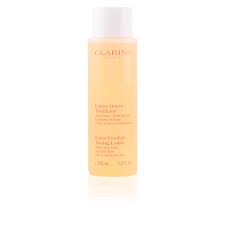

[1. 0.]


In [27]:
from IPython.core.display import Image, display
random_number=29

img=imagePaths[random_number]
display(Image( img, width=200, unconfined=True))

print(labels[random_number])

as you can see , jean  is transformed to [0 0 1] <br>
you can change the 'random_number' and check the transformation
***

### construct the training and testing splits

In [28]:
# partition the data into training and testing splits using 80% 
#of the data for training and the remaining 20% for testing
(trainX, testX, trainY, testY) = train_test_split(data,labels,
    test_size=0.2, random_state=42)

In [29]:
print("TrainingSet :")
print(trainX.shape  )
print(trainY.shape  )
print(" \n TestingSet :")
print(testX.shape  )
print(testY.shape  )

TrainingSet :
(452, 100, 150, 3)
(452, 2)
 
 TestingSet :
(113, 100, 150, 3)
(113, 2)


#### DATA AUGMENTATION :

Data augmentation is a best practice and a most-likely a “must” if you are working with less than 1,000 images per class

In [30]:
aug = ImageDataGenerator(rotation_range=0, width_shift_range=0,
    height_shift_range=0, shear_range=0, zoom_range=0,
    horizontal_flip=False, fill_mode="nearest")

## Model building


In [7]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K

In [15]:
def classif(path):
          #chanels last so -1 for tensorflow , channels first so 1 for theano

    EPOCHS = 75
    INIT_LR = 1e-3
    BS = 32
    chanDim=-1
    IMAGE_DIMS = (100,150,3)      

    model=Sequential()

    # CONV => RELU => POOL
    model.add(Conv2D(32, (3, 3), padding="same",input_shape=IMAGE_DIMS))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.25))

    # (CONV => RELU) * 2 => POOL
    model.add(Conv2D(64, (3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(64, (3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # (CONV => RELU) * 2 => POOL
    model.add(Conv2D(128, (3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(128, (3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # first (and only) set of FC => RELU layers
    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    # use a *softmax* activation for single-label classification
    # and *sigmoid* activation for multi-label classification
    model.add(Dense(2))
    model.add(Activation("sigmoid"))
 

    model.load_weights("/home/ilyes/Tunihack/classification/datasetV2_SSize.h5")

    image = cv2.imread(img_path)

    # pre-process the image for classification
    image = cv2.resize(image, (150, 100))
    image = image.astype("float") / 255.0
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)

    proba = model.predict(image)[0]
    
    if (proba[0]>proba[1]):
        return ("Lotion")
    else :
        return("Parfume")


In [16]:
path="/home/ilyes/Tunihack/the_one2.jpg"

ch= classif(path)



In [17]:
ch

'Parfume'

In [8]:
EPOCHS = 75
INIT_LR = 1e-3
BS = 32
chanDim=-1
IMAGE_DIMS = (100,150,3)      


In [9]:
  #chanels last so -1 for tensorflow , channels first so 1 for theano

model=Sequential()

# CONV => RELU => POOL
model.add(Conv2D(32, (3, 3), padding="same",input_shape=IMAGE_DIMS))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

# (CONV => RELU) * 2 => POOL
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# (CONV => RELU) * 2 => POOL
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# first (and only) set of FC => RELU layers
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
 
# use a *softmax* activation for single-label classification
# and *sigmoid* activation for multi-label classification
model.add(Dense(2))
model.add(Activation("sigmoid"))
 














Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 150, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 100, 150, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 100, 150, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 33, 50, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 33, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 33, 50, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 33, 50, 64)        0         
__________

### set model parameter 

In [37]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)

# compile the model using binary cross-entropy rather than
# categorical cross-entropy -- this may seem counterintuitive for
# multi-label classification, but keep in mind that the goal here
# is to treat each output label as an independent Bernoulli distribution

model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=["accuracy"])

# Train the model

In [38]:
print("[INFO] training network...")
H = model.fit_generator(
    aug.flow(trainX, trainY, batch_size=BS),
    validation_data=(testX, testY),
    steps_per_epoch=len(trainX) // BS,
    epochs=EPOCHS, verbose=1)

[INFO] training network...
Epoch 1/75
14/14 [==============================] - 3s 233ms/step - loss: 0.5549 - acc: 0.8705 - val_loss: 0.9081 - val_acc: 0.8761
Epoch 2/75
14/14 [==============================] - 1s 98ms/step - loss: 0.3553 - acc: 0.9058 - val_loss: 0.5354 - val_acc: 0.9115
Epoch 3/75
14/14 [==============================] - 1s 89ms/step - loss: 0.2619 - acc: 0.9350 - val_loss: 0.3097 - val_acc: 0.8850
Epoch 4/75
14/14 [==============================] - 1s 89ms/step - loss: 0.2497 - acc: 0.9069 - val_loss: 0.5755 - val_acc: 0.7965
Epoch 5/75
14/14 [==============================] - 1s 89ms/step - loss: 0.3415 - acc: 0.9182 - val_loss: 1.2974 - val_acc: 0.8053
Epoch 6/75
14/14 [==============================] - 1s 90ms/step - loss: 0.2465 - acc: 0.9170 - val_loss: 0.7892 - val_acc: 0.9027
Epoch 7/75
14/14 [==============================] - 1s 89ms/step - loss: 0.1927 - acc: 0.9271 - val_loss: 1.5336 - val_acc: 0.8319
Epoch 8/75
14/14 [==============================] - 1s 

Epoch 63/75
14/14 [==============================] - 1s 88ms/step - loss: 0.1107 - acc: 0.9641 - val_loss: 0.3279 - val_acc: 0.8938
Epoch 64/75
14/14 [==============================] - 1s 90ms/step - loss: 0.2480 - acc: 0.9305 - val_loss: 4.6420 - val_acc: 0.4248
Epoch 65/75
14/14 [==============================] - 1s 88ms/step - loss: 0.1313 - acc: 0.9484 - val_loss: 0.5312 - val_acc: 0.7788
Epoch 66/75
14/14 [==============================] - 1s 88ms/step - loss: 0.1697 - acc: 0.9237 - val_loss: 0.3490 - val_acc: 0.9115
Epoch 67/75
14/14 [==============================] - 1s 89ms/step - loss: 0.1085 - acc: 0.9552 - val_loss: 0.3758 - val_acc: 0.9027
Epoch 68/75
14/14 [==============================] - 1s 89ms/step - loss: 0.1005 - acc: 0.9596 - val_loss: 0.3832 - val_acc: 0.9115
Epoch 69/75
14/14 [==============================] - 1s 89ms/step - loss: 0.1614 - acc: 0.9170 - val_loss: 0.3703 - val_acc: 0.9027
Epoch 70/75
14/14 [==============================] - 1s 89ms/step - loss: 0.

#### plot the training loss and accuracy


In [39]:
plt.style.use("ggplot")
plt.figure()
N = EPOCHS
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")
plt.savefig("/home/ilyes/Desktop/img.png")

#### Save your model
next time you don't need to rerun the  training, directly load the model with the trained weights with : <br>
model = load_model('my_model.h5')

In [41]:
model.save("/home/ilyes/Tunihack/classification/datasetV2_SSize.h5")

#### congratulation you have successfully trained and saved your model  with an accuracy of 0.979
***

In [11]:
model.load_weights("/home/ilyes/Tunihack/classification/datasetV2_SSize.h5")


## Test your model new images

In [43]:
# import the necessary packages
from IPython.core.display import Image, display
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import numpy as np
import argparse
import imutils
import pickle
import cv2
import os

#### donload an image and load it

In [12]:
random_number=15
img_path="/home/ilyes/Tunihack/the_one2.jpg"
image = cv2.imread(img_path)

# pre-process the image for classification
image = cv2.resize(image, (150, 100))
image = image.astype("float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

proba = model.predict(image)[0]


In [13]:
print(proba)

[1.4095081e-04 9.9999952e-01]


In [56]:
img_path="/home/ilyes/detailed_Keras_CNN_classification/damaget or not dataset/test/test5.jpg"
img = cv2.imread(img_path)


haut=img.shape[0]
larg=img.shape[1]

dic={}
for i in range((larg//5)*4,larg,larg//15):

    for j in range((haut//5)*3,haut,haut//20):
        
        for h in range (-(haut-j),haut-j,j//6):
            
            for k in range (-(larg-i),larg-i,i//6):
        
                temp_img=img[haut-j+h:j+h,larg-i+k:i+k,:]
                to_write=temp_img

                temp_img = cv2.resize(temp_img, (150, 100))

                temp_img = temp_img.astype("float") / 255.0
                temp_img = img_to_array(temp_img)
                temp_img = np.expand_dims(temp_img, axis=0)

                # give a probability for each class
                proba = model.predict(temp_img)[0]
                
                if(proba[0]>0.9 ):
                    dic[proba[0]]=[i,j,h,k]
                
l=sorted(dic.keys())


In [57]:
import matplotlib.pyplot as plt


inc=0
for i in range(len(dic)-10,len(dic)):
    cord=dic[l[i]]
    temp_img=img[haut-cord[1]+cord[2]:cord[1]+cord[2],larg-cord[0]+cord[3]:cord[0]+cord[3],:]
    to_write=temp_img
    cv2.imwrite("/home/ilyes/Desktop/img_cropped_test/best_fit "+str(inc)+".jpg",to_write)

    inc=inc+1

In [58]:
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(to_write)
axarr[0,1].imshow(to_write)
axarr[1,0].imshow(to_write)
axarr[1,1].imshow(to_write)

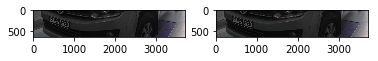

In [23]:
f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(to_write)
f.add_subplot(1,2, 2)
plt.imshow(to_write)
plt.show(block=True)


### make prediction

In [64]:
# give a probability for each class
proba = model.predict(image)[0]

# take the two higher probas
top_two = np.argsort(proba)[::-1][:2]

[0.9999614  0.00589678]


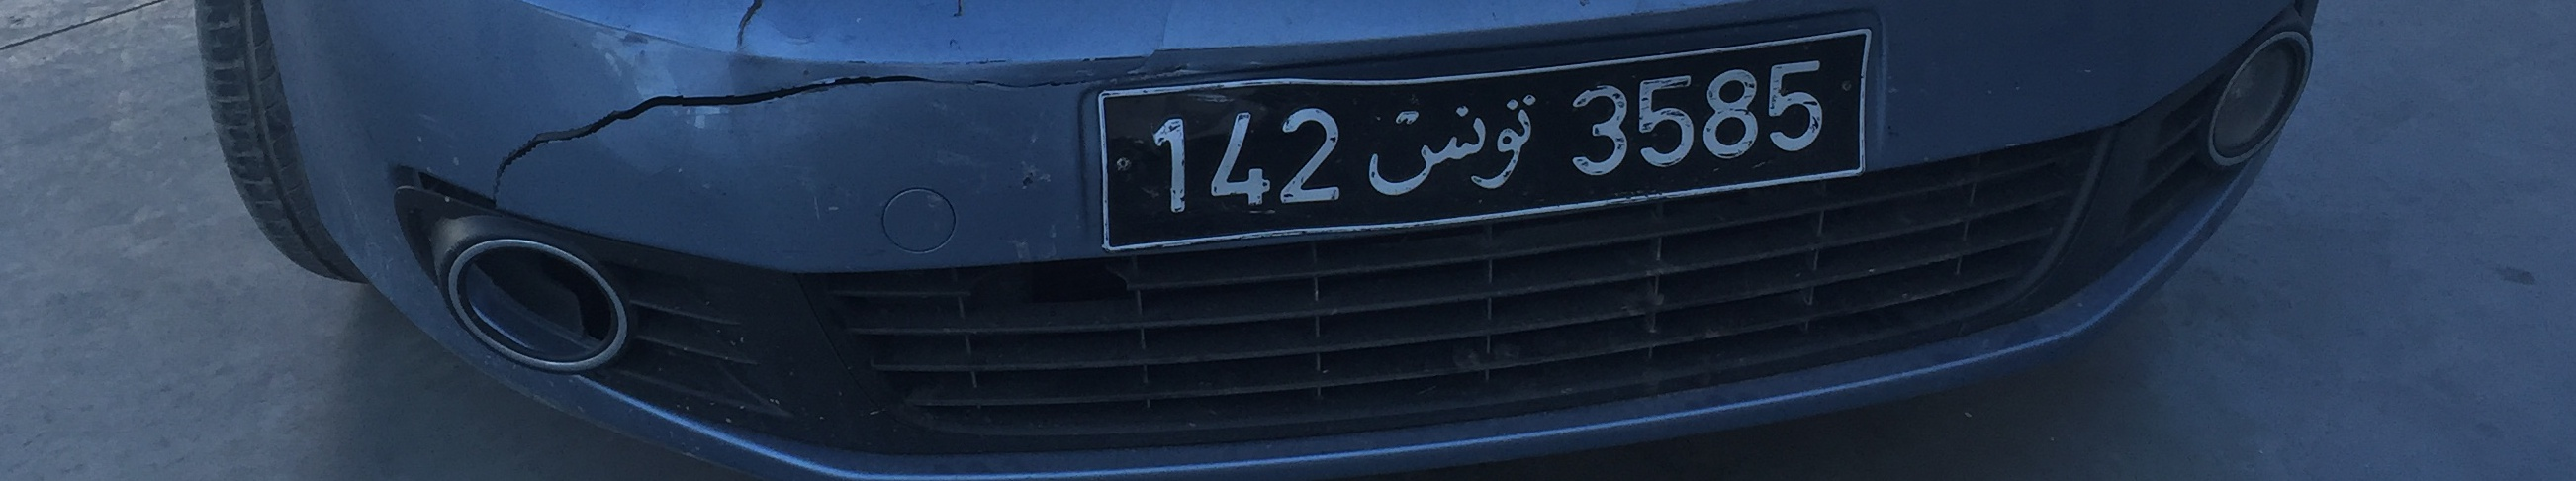

In [65]:
# show the probabilities for each of the individual labels
print(proba)
# show the output image
display(Image( img_path, width=200, unconfined=True))

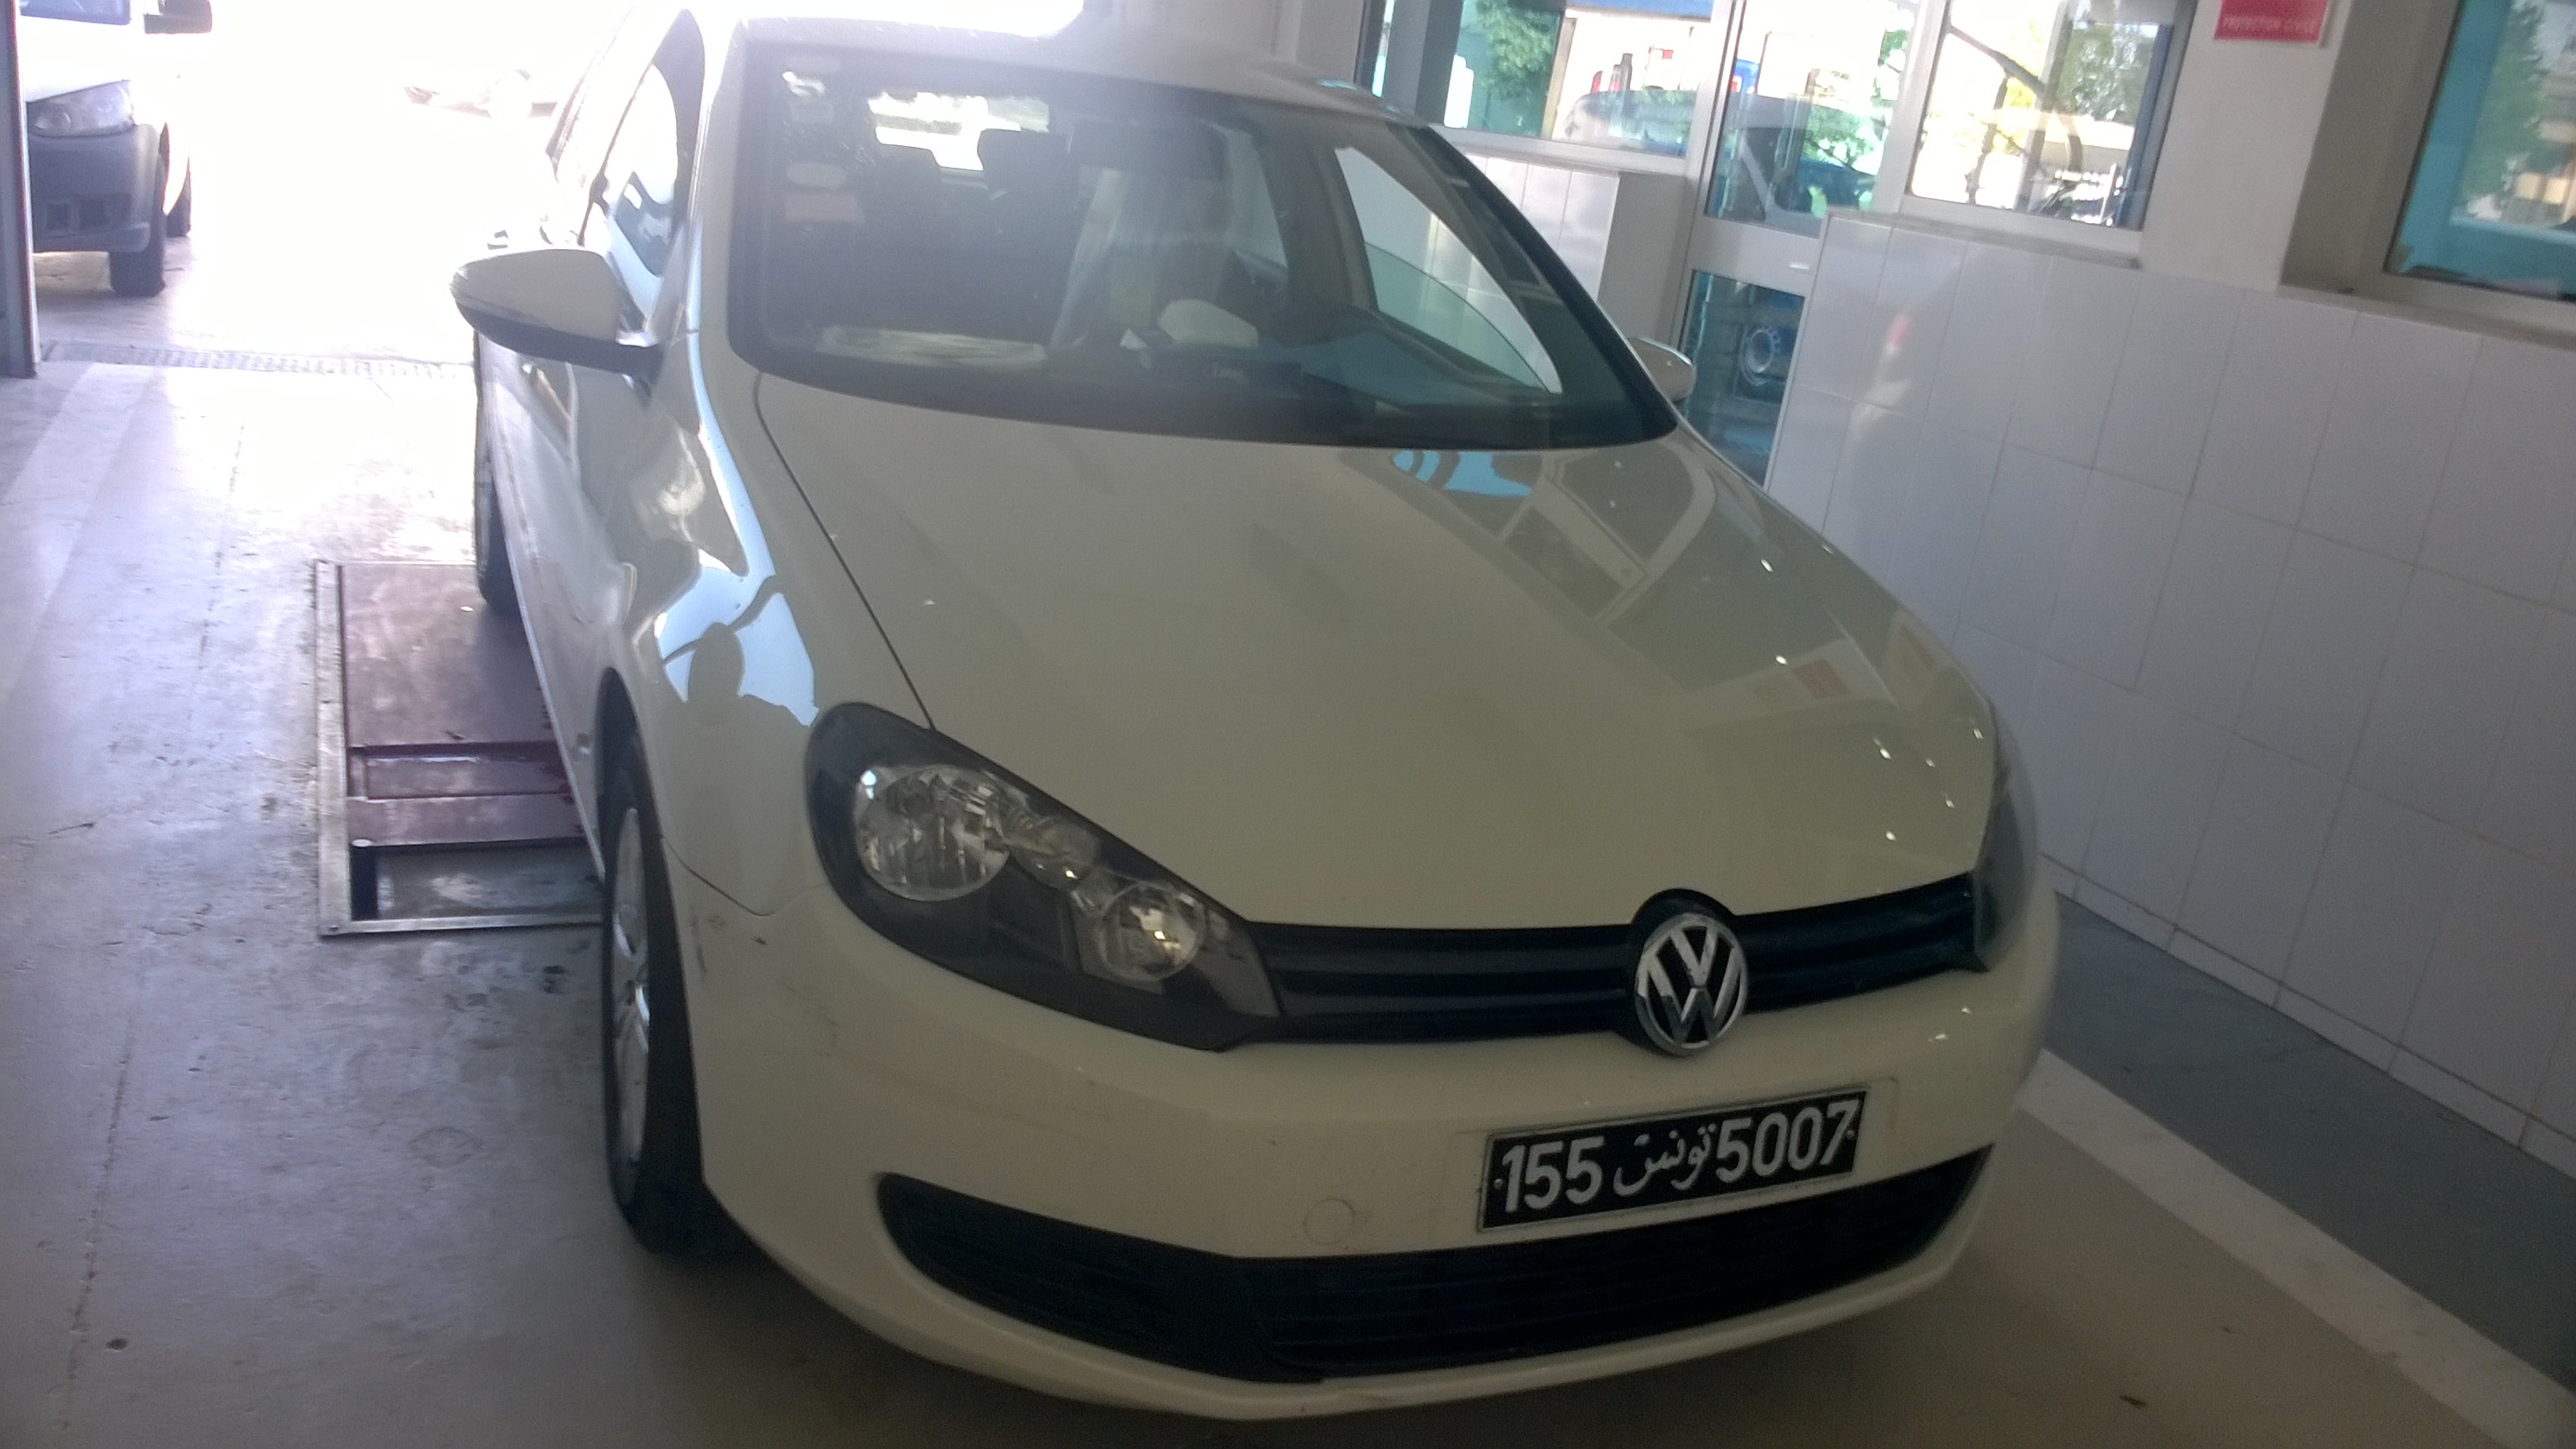

0


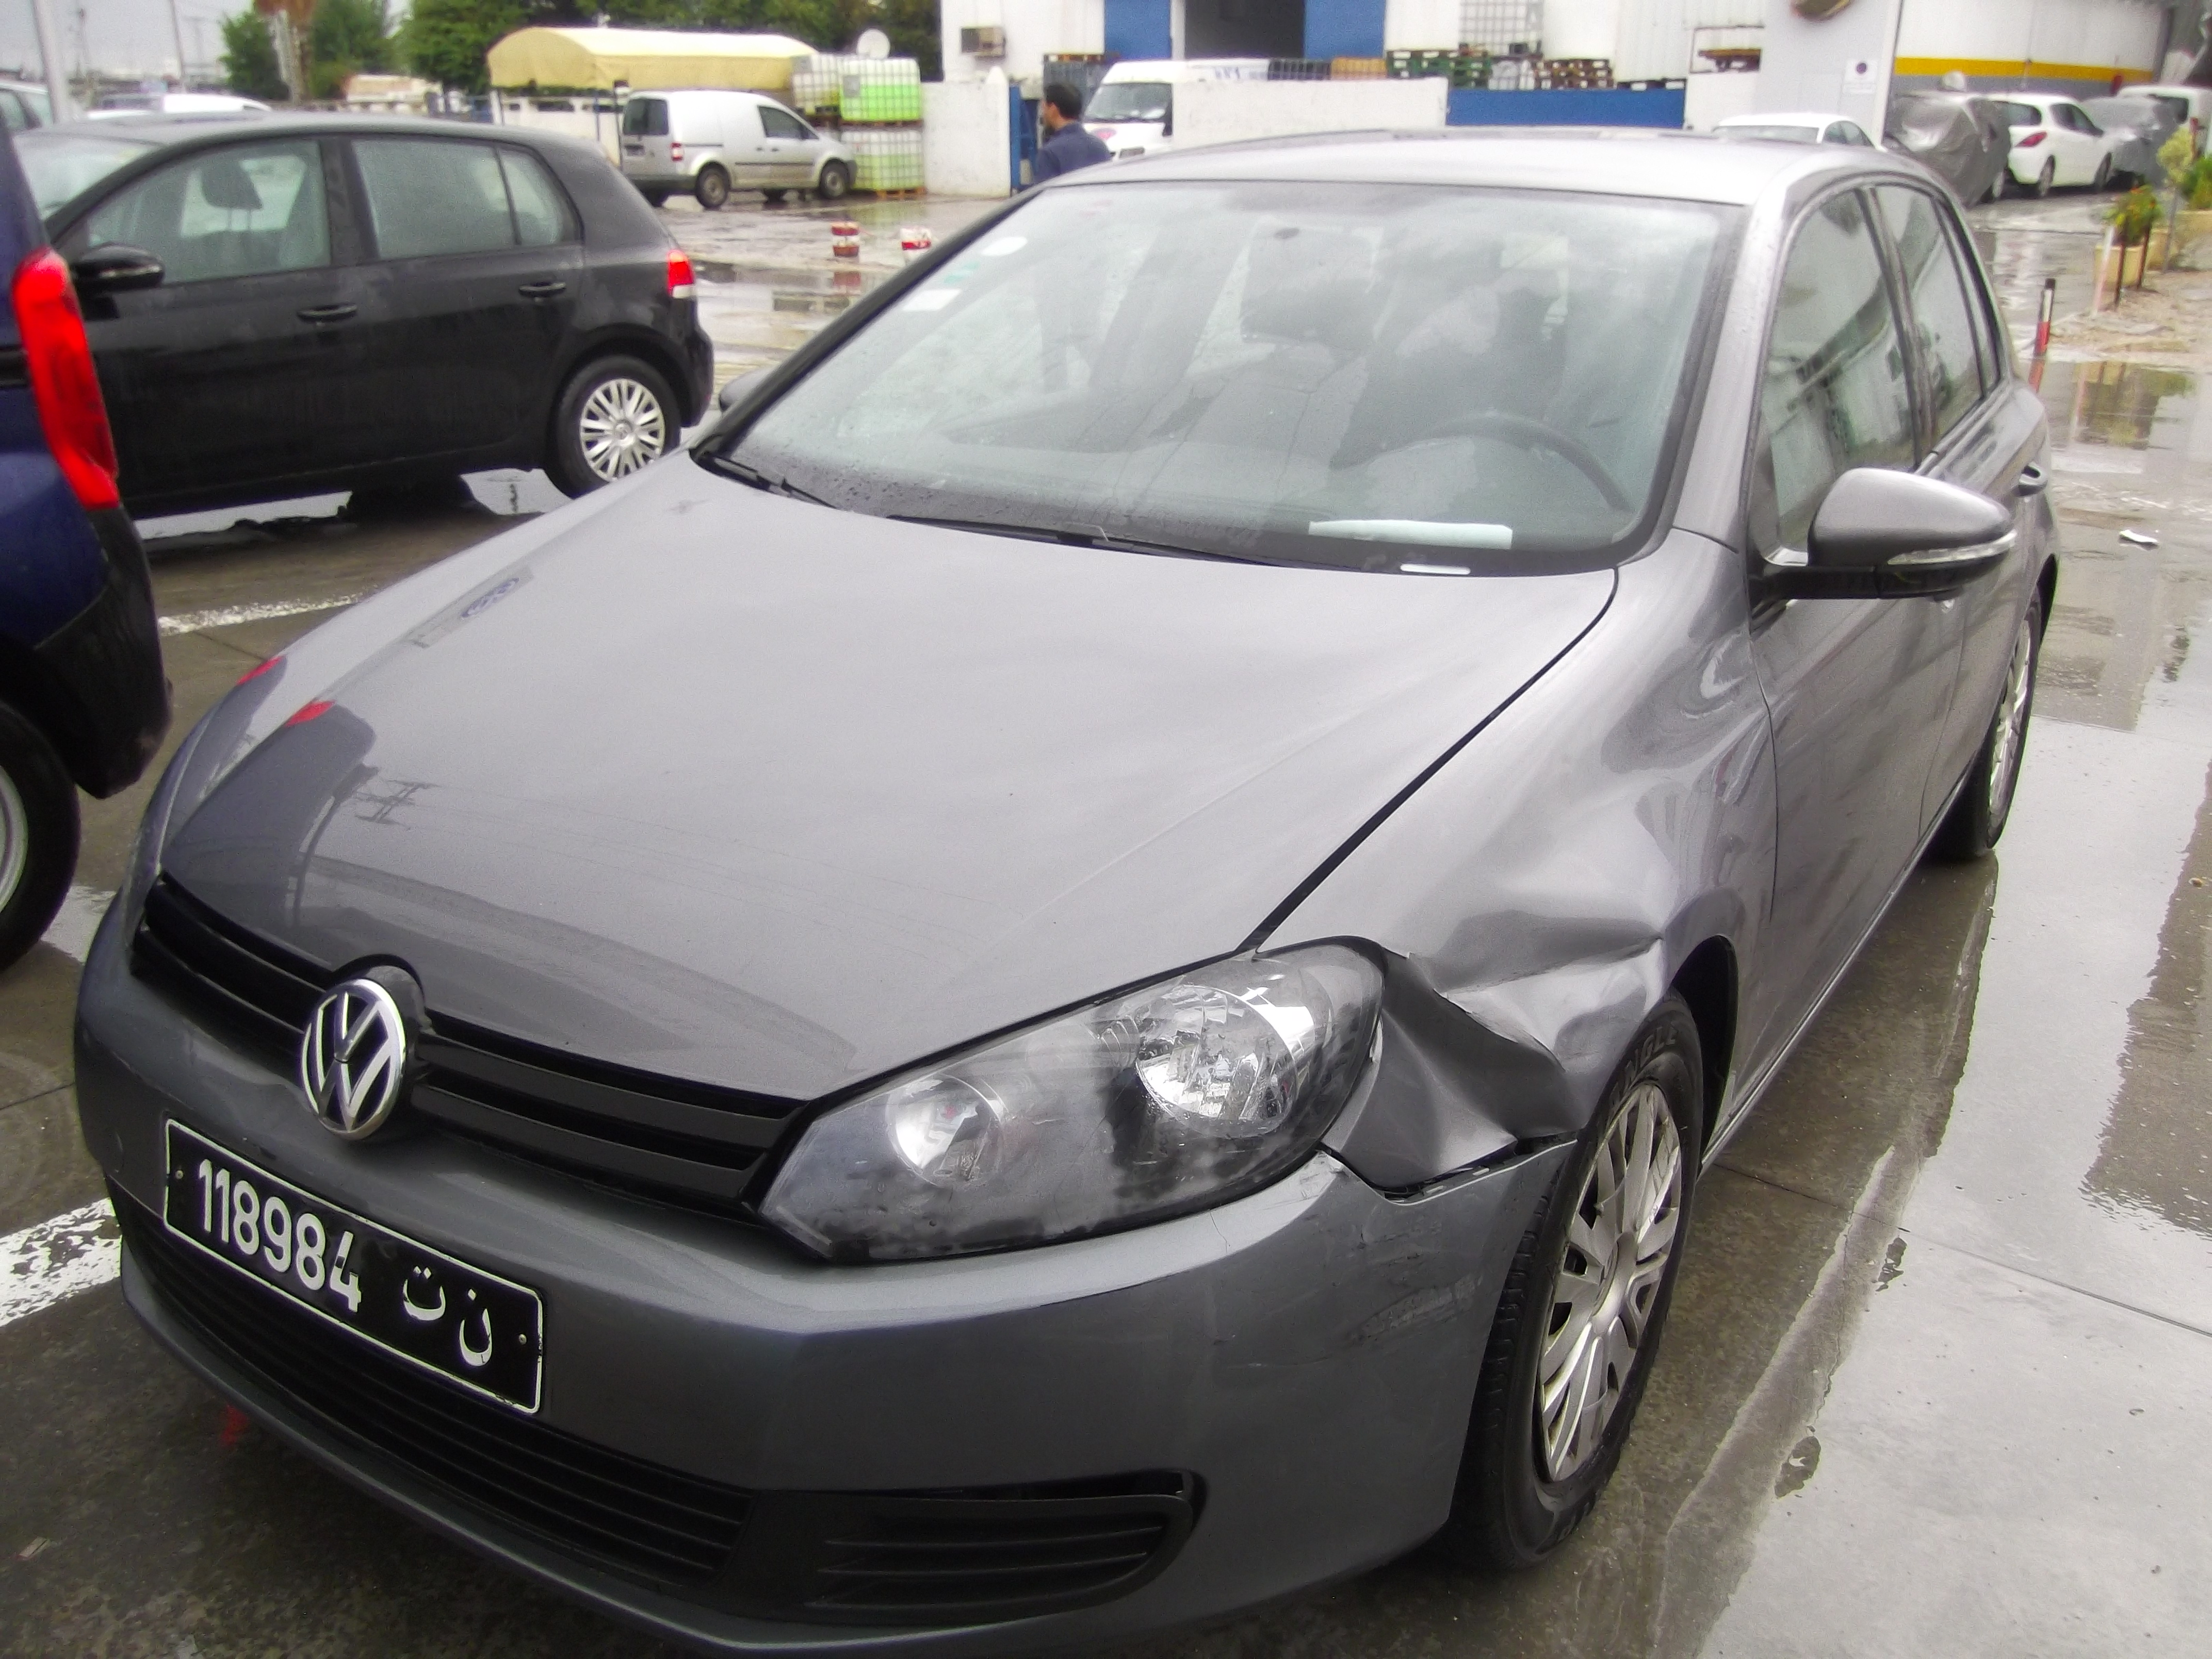

KeyboardInterrupt: 

In [105]:
import os 
import glob 


img_dir = "/home/ilyes/Desktop/classification folders/endom cropped not cropped by hand bumpers/*"
images = glob.glob(img_dir)

for filename in images : 

    img_path=filename
    img = cv2.imread(img_path)


    haut=img.shape[0]
    larg=img.shape[1]
    
    
    ###############################################################
    #   generate 300 subimage and take images with best results   #
    ###############################################################
    dic={}
    for i in range((larg//5)*4,larg,larg//15):

        for j in range((haut//5)*3,haut,haut//20):

            for h in range (-(haut-j),haut-j,j//6):

                for k in range (-(larg-i),larg-i,i//6):

                    temp_img=img[haut-j+h:j+h,larg-i+k:i+k,:]
                    to_write=temp_img

                    temp_img = cv2.resize(temp_img, (300, 200))

                    temp_img = temp_img.astype("float") / 255.0
                    temp_img = img_to_array(temp_img)
                    temp_img = np.expand_dims(temp_img, axis=0)

                    # give a probability for each class
                    proba = model.predict(temp_img)[0]

                    if(proba[0]>0.9 ):
                        dic[proba[0]]=[i,j,h,k]

    l=sorted(dic.keys())

    x=min(len(l),15)

    
    aff=filename
    display(Image( aff, width=400, unconfined=True))
    
    
    ###############################################################
    #             Print images with best rating                   #
    ###############################################################
    inc=0
    for i in range(len(l)-1,len(l)-x,-1):
        cord=dic[l[i]]
        temp_img=img[haut-cord[1]+cord[2]:cord[1]+cord[2],larg-cord[0]+cord[3]:cord[0]+cord[3],:]
        to_write=temp_img
        cv2.imwrite("/home/ilyes/Desktop/classification folders/output/temporary/best_fit "+str(inc+1)+".jpg",to_write)

        inc=inc+1
        
    ###############################################################
    #   put each image in it's place and fill csv file            #
    ###############################################################   
    templist=[]
    while (True):
        x=input()
        if(int(x)<16 and int(x)>-1):
            break
    
    name=filename.split("/")[-1] #the name of the image in the original folder
    if(int(x)<15 and int(x)>0):
        source="/home/ilyes/Desktop/classification folders/output/temporary/best_fit " +x+".jpg"
        dist="/home/ilyes/Desktop/classification folders/output/bumpers_cropped_by_model/best_fit "+x+".jpg"
       
        os.rename(source,dist ) # put the cropped bumper in it's place
        os.rename(filename, "/home/ilyes/Desktop/classification folders/output/bumpers_cropped_not_cropped_by_model/"+name) 
        
        ########### fill the csv #####################
        templist.append(name)
        x=int(x)
        cord=dic[l[-x]]  # list l counted backward.
        templist.append(haut-cord[1]+cord[2]) #xmin
        templist.append(cord[1]+cord[2])      #xmax

        templist.append(larg-cord[0]+cord[3]) #ymin
        templist.append(cord[0]+cord[3])      #ymax        
        
        listframe.append(templist)
        continue
    else:
        os.rename(filename, "/home/ilyes/Desktop/classification folders/output/bad_result/"
                 +filename.split("/")[-1])
        continue



In [106]:
len(listframe)

68

In [107]:
import pandas as pd  
  
# Create the pandas DataFrame 
df = pd.DataFrame(listframe, columns = ['name' ,'xmin','xmax','ymin','ymax']) 
  
# print dataframe. 
df 

name  xmin  xmax  ymin  ymax
0       1 (1635).20170124_090704.jpg   320  1040     0  1596
1              1 (2105).IMG_0791.JPG   325  1787   470  2856
2       1 (1612).WP_20171107_145.jpg   804  1490   443  2691
3       1 (2119).WP_20171010_203.jpg  1005  1691   818  2658
4       1 (1265).WP_20170515_332.jpg  1005  1691   818  2658
5   1 (1835).IMG_20180530_134609.jpg  1035  2583     0  4602
6              1 (1511).DSCN6431.JPG   772  2678  1458  3642
7       1 (2178).WP_20170424_247.jpg     0  1374     0  3064
8       1 (2303).20161114_164736.jpg   700  1180   231  1403
9              1 (2306).DSCF5293.JPG   712  1322   272  1496
10      1 (1021).20170509_145805.jpg  1506  2200  1100  3572
11  1 (1381).IMG_20180201_133628.jpg  1820  3068     0  3604
12             1 (1265).DSCN2605.JPG  1446  3372     0  4460
13      1 (519).DSCF4420 - Copie.JPG   410   636   408  1016
14  1 (2038).IMG_20180228_092637.jpg     0  1806  1842  4602
15             1 (1414).DSCF0177.JPG   573  1335     0  1224
16       1 (783).20160215_101741.jpg  1584  2314   868  2820
17      1 (1906).20161006_150019.jpg   180  1140     0  1596
18      1 (1033).WP_20180514_400.jpg     0  1374   443  2691
19      1 (1906).20161006_150256.jpg     0  1080     0  1596
20             1 (1965).DSCN2393.JPG  1672  2826   686  3774
21      1 (1935).20160906_162121.jpg   544  1888     0  2216
22      1 (1538).WP_20170628_193.jpg   152   490     0   880
23             1 (1835).DSCN5027.JPG  1272  2362     0  3156
24   1 (783).IMG_20150804_114258.jpg   204  1118     0  2040
25      1 (2303).20161114_164718.jpg   340  1180     0  1596
26             1 (1265).DSCN2602.JPG  1800  3340   743  4517
27       1 (783).20160205_120554.jpg   975  2437     0  2820
28       1 (668).WP_20170519_205.jpg     0   562   147   891
29      1 (1415).20161226_103555.jpg   650  1010   231  1403
..                               ...   ...   ...   ...   ...
38   1 (783).IMG_20180328_145101.jpg   388  2452   665  4039
39       1 (783).20161031_105907.jpg  1248  1824   369  2245
40              1 (865).DSCF5331.JPG  1740  2702     0  3708
41              1 (737).DSCN5164.JPG   445   747   147   891
42              1 (783).IMG_1961.JPG  1425  2399   470  2856
43  1 (1094).IMG_20180129_103508.jpg  1510  2542   614  3374
44             1 (1085).DSCF0149.JPG  1203  2805     0  3708
45     1 (1302).DSCF4007 - Copie.JPG   445   747   408  1016
46              1 (783).IMG_1518.JPG  1220  2438     0  3254
47              1 (783).IMG_0637.JPG  1140  2114   868  2820
48   1 (494).IMG_20180606_092525.jpg   388  2452     0  4602
49   1 (783).IMG_20150505_094423.jpg   612  1526     0  1496
50              1 (783).IMG_2500.JPG   325  1787     0  3254
51       1 (636).WP_20171102_216.jpg   142   424     0   880
52   1 (783).IMG_20180328_145051.jpg  1510  2542   614  3374
53  1 (1381).IMG_20180201_132906.jpg   884  3068     0  4158
54              1 (783).IMG_2497.JPG  1220  2438   868  2820
55              1 (783).IMG_0420.JPG  1140  2114   470  2856
56              1 (487).DSCF6604.JPG   908  3150     0  4278
57       1 (783).20161031_105912.jpg   512  1664     0  2556
58              1 (865).DSCF3760.JPG  1203  2805  1142  3710
59   1 (494).IMG_20180606_092405.jpg   366  2172     0  4602
60              1 (865).DSCF5264.JPG  2088  3050     0  2568
61              1 (783).IMG_8704.JPG   346  2052     0  3254
62              1 (783).IMG_0631.JPG  1425  2399   470  2856
63   1 (506).IMG_20180130_084229.jpg   445   747   408  1016
64   1 (506).IMG_20180130_084236.jpg   445   747   147   891
65      1 (519).DSCF4418 - Copie.JPG   445   747   272   880
66       1 (541).20160523_110958.jpg   432  1498     0  2040
67  1 (1381).IMG_20180201_132800.jpg  2028  2964   600  3650

[68 rows x 5 columns]

In [108]:
df.to_csv('/home/ilyes/Desktop/classification folders/output/out15.csv')
